In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from tensorboard.backend.event_processing import event_accumulator 
from collections import defaultdict

In [2]:
LOG_DIR = "./mpe_logs"
SAVE_NUMPY = False 

STORE_EVERYTHING_SIZE_GUIDANCE = {
    'compressedHistograms': 0, 
    'images': 0, 
    'audio': 0, 
    'scalars': 0, 
    'histograms': 0, 
} 


In [3]:
def get_values(filename, scalar="Episodic_Reward"): 
    ea = event_accumulator.EventAccumulator(filename, size_guidance=STORE_EVERYTHING_SIZE_GUIDANCE)
    ea.Reload()
    # print(ea.Tags()) 
    ea_scalar = ea.Scalars(tag=scalar) 
    ea_scalar = pd.DataFrame(ea_scalar) 
    return ea_scalar 

In [4]:
if SAVE_NUMPY: 
    logs = glob.glob(os.path.join(LOG_DIR, "*/**/event*"), recursive=True) 
    for log in logs: 
        print(log) 
        vals = get_values(log, scalar="Episodic Return")['value'].to_numpy() 
        # vals = get_values(log, scalar="Episodic_Reward")['value'].to_numpy() 
        path = "/".join(log.split("/")[:-1]) 
        with open(path+'/arr.npy', 'wb') as f: 
            np.save(f, vals) 
        # break 

In [18]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    # return np.array(pd.Series(y).rolling(box_pts).mean()) 
    return y_smooth

exp: noam--n_2--random_other_agent_1
./mpe_logs/noam--n_2--random_other_agent_1--seed_5/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_2/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_3/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_4/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_11/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_16/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_20/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_18/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_19/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_17/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_10/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_8/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_6/arr.npy (30000,)
./mpe_logs/noam--n_2--random_other_agent_1--seed_7/arr.npy (30000,)
./mp

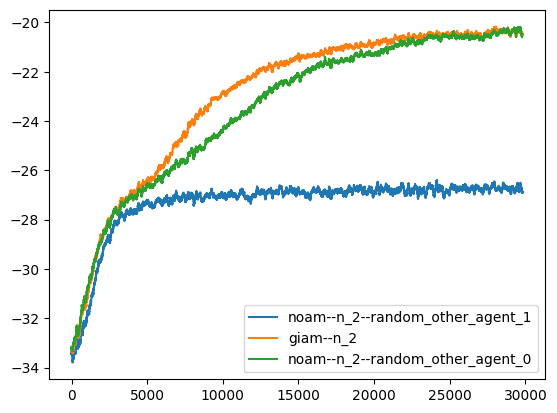

In [27]:
logs = glob.glob(os.path.join(LOG_DIR, "*/**/*.npy"), recursive=True) 
exps = set() 
[exps.add("--".join(l.split("/")[-2].split("--")[:-1]))  for l in logs] 
# print(exps) 

vals = [] 
for e in exps: 
    print("exp:", e) 
    vals = [] 
    for l in logs: 
        if e in l: 
            x = np.load(l) 
            print(l, x.shape) 
            vals.append(x) 
    vals = np.array(vals) 
    val_means = np.mean(vals, axis=0)
    val_std = np.std(vals, axis=0)
#     print(val_std.shape) 
    plt.plot(smooth(val_means)[100:-100], label = e )
#     break 
plt.legend() 
plt.show() 
